In [2]:
import json
import pandas as pd
import os
import seaborn as sns
from pprint import pprint
# from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
json_file_list=[{'file':x,'alias':os.path.splitext(x)[0].replace('yelp_academic_dataset_','')} for x in os.listdir("../Data") if os.path.splitext(x)[1]=='.json']
json_file_list

[{'file': 'yelp_academic_dataset_business.json', 'alias': 'business'},
 {'file': 'yelp_academic_dataset_checkin.json', 'alias': 'checkin'},
 {'file': 'yelp_academic_dataset_review.json', 'alias': 'review'},
 {'file': 'yelp_academic_dataset_tip.json', 'alias': 'tip'},
 {'file': 'yelp_academic_dataset_user.json', 'alias': 'user'}]

In [21]:
with open(f'../Data/yelp_academic_dataset_business.json', encoding="utf8") as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))
    business_df = pd.DataFrame(data)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [10]:
len(business_df)

150346

In [32]:
for idx in range(5):
    name=business_df['name'].iloc[idx]
    attributes=business_df['attributes'].iloc[idx]
    categories=business_df['categories'].iloc[idx]
    print(f'\n=== {idx}:{name}: Attributes ===')
    pprint(attributes)

    print(f'\n=== {idx}:{name}: Categories===')
    pprint(categories)


=== 0:Abby Rappoport, LAC, CMQ: Attributes ===
{'ByAppointmentOnly': 'True'}

=== 0:Abby Rappoport, LAC, CMQ: Categories===
('Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, '
 'Health & Medical, Nutritionists')

=== 1:The UPS Store: Attributes ===
{'BusinessAcceptsCreditCards': 'True'}

=== 1:The UPS Store: Categories===
'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services'

=== 2:Target: Attributes ===
{'BikeParking': 'True',
 'BusinessAcceptsCreditCards': 'True',
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, "
                    "'lot': True, 'valet': False}",
 'ByAppointmentOnly': 'False',
 'Caters': 'False',
 'CoatCheck': 'False',
 'DogsAllowed': 'False',
 'HappyHour': 'False',
 'HasTV': 'False',
 'OutdoorSeating': 'False',
 'RestaurantsDelivery': 'False',
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'False',
 'RestaurantsTakeOut': 'False',
 'WheelchairAccessible': 'True',
 'WiFi':

<Axes: xlabel='city'>

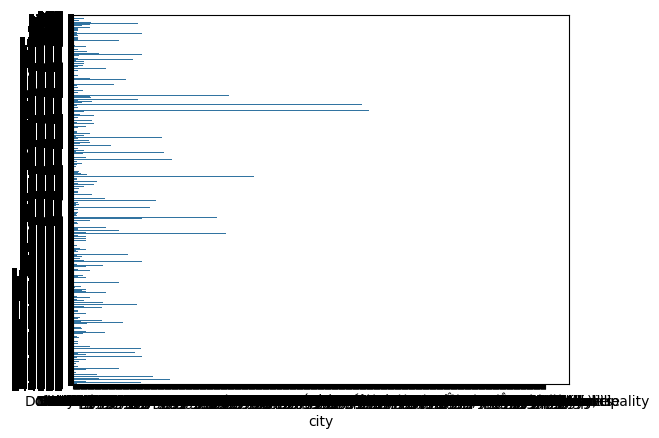

In [6]:
sns.barplot(data=business_df.city, orient = 'h')


In [12]:
with open(f'../Data/yelp_academic_dataset_checkin.json', encoding="utf8") as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))
    checkin_df = pd.DataFrame(data)
checkin_df.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [13]:
len(checkin_df)

131930

In [19]:
for idx in range(5):
    print(f'\n=== Checkins {idx} ===')
    print('time:',checkin_df['time'].iloc[idx])


=== Checkins 0 ===
time: ['Fri-0:2', 'Sat-0:1', 'Sun-0:1', 'Wed-0:2', 'Sat-1:2', 'Thu-1:1', 'Wed-1:1', 'Sat-2:1', 'Sun-2:2', 'Thu-2:1', 'Wed-2:1', 'Fri-3:1', 'Sun-3:3', 'Thu-4:1', 'Tue-4:1', 'Sun-6:1', 'Wed-6:1', 'Fri-10:1', 'Sat-10:1', 'Mon-11:1', 'Wed-11:2', 'Mon-12:1', 'Sat-12:1', 'Tue-12:1', 'Sat-13:2', 'Thu-13:1', 'Tue-13:2', 'Wed-13:2', 'Fri-14:2', 'Sat-14:1', 'Wed-14:1', 'Fri-15:1', 'Sat-15:1', 'Thu-15:1', 'Tue-15:1', 'Fri-16:1', 'Sat-16:2', 'Sun-16:1', 'Tue-16:1', 'Sat-17:3', 'Sun-17:1', 'Fri-18:1', 'Mon-18:1', 'Sat-18:2', 'Sun-18:1', 'Tue-18:2', 'Wed-18:1', 'Fri-19:2', 'Mon-19:1', 'Sun-19:2', 'Thu-19:1', 'Wed-19:1', 'Mon-20:1', 'Sun-20:5', 'Thu-20:1', 'Tue-20:1', 'Wed-20:2', 'Fri-21:2', 'Sun-21:1', 'Thu-21:4', 'Tue-21:1', 'Wed-21:1', 'Fri-22:1', 'Thu-22:1', 'Fri-23:1', 'Mon-23:1', 'Sat-23:3', 'Sun-23:1', 'Thu-23:2', 'Tue-23:1']

=== Checkins 1 ===
time: ['Mon-13:1', 'Thu-13:1', 'Sat-16:1', 'Wed-17:1', 'Sun-19:1', 'Thu-20:1', 'Sat-21:1']

=== Checkins 2 ===
time: ['Thu-0:1', '

In [14]:
with open(f'../Data/yelp_academic_dataset_review.json', encoding="utf8") as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))
    review_df = pd.DataFrame(data)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [15]:
len(checkin_df)

131930

In [6]:
review_df.describe()

,stars,useful,funny,cool
count,4.153150e+06,4.153150e+06,4.153150e+06,4.153150e+06
mean,3.722765e+00,1.008271e+00,4.194826e-01,5.262232e-01
std,1.405131e+00,2.585058e+00,1.721744e+00,1.914351e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.125000e+03,6.320000e+02,5.130000e+02


In [16]:
with open(f'../Data/yelp_academic_dataset_tip.json', encoding="utf8") as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))
    tip_df = pd.DataFrame(data)
tip_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [17]:
len(tip_df)

908915

In [8]:
tip_df.describe()

,likes
count,946600.000000
mean,0.016907
std,0.147131
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


In [18]:
with open(f'../Data/yelp_academic_dataset_user.json', encoding="utf8") as data_file:
    data = []
    for line in data_file:
        data.append(json.loads(line))
    user_df = pd.DataFrame(data)
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


In [19]:
len(user_df)

1987897

In [17]:
for idx in range(5):
    print(f'\n=== User attributes {idx}:{user_df['name'].iloc[idx]} ===')
    print('elite:',user_df['elite'].iloc[idx])
    print('friends:',user_df['friends'].iloc[idx])


=== User attributes 0:Rob ===
elite: ['2017', '2015', '2016', '2014', '2011', '2013', '2012']
friends: ['iJg9ekPzF9lkMuvjKYX6uA', 'ctWAuzS04Xu0lke2Rop4lQ', 'B8CqppjOne8X4RSJ5KYOvQ', '_K9sKlA4fVkWI4hyGSpoPA', 'Ec-epOsAWvjI6e90IlM8jw', 'r2UUCzGxqI6WPsiWPgqG2A', '3ybkL7N63UdSn4wepINzUw', 'd-lzusSagnkDuiyLlfF5pw', 'Ydh2zA5wUlD-UbApp8toGA', 'DeZhnC-RsNFmKSlI0lUksw', 'NTuvVb-ZwQ_rFn6W9Krm7A', 'PCdUS3L8LhQOereIyQ6_RA', 'RYIhfaNekKLDuqmwqkVi3g', 'i-mQUeJVKqXscelJ7XjT2w', '5T_2RWFzvf-nMZYD0RsvWg', 'DTo6vHKzyx8RmMrVbTgowg', 'kOUzW4porPxN0n54Z0eHMQ', 'x-lu6ZBVTjyHFvoq3f0K4w', '8Gy1MJ4gCnOL8qiwD2ZGLQ', '8esbQFK-w5xRMnQZvnaADg', 'YeEUeu7W3TM9PjBsGlyktg', 'EJ8pe71KG0UXb2SbI9ACKw', '22KNmeq7zf3Mv8RwipstUA', 'UO8mDYLNOa3g9i2zmHnyuA', 'a-Ug_MFryz3utca-NaMkNQ', 'lfX4Ay6lYeWQ2kSdAxJaDg', 'kjSHVCJlFl6Zfgp72WJ0jQ', 'Z6V6xuIgxgVqqpFhphNTIQ', 'npSj4F1BCNGodni0e2SoVg', '3DRVeLgbdM1GRBu7T3ydeQ', '8-WGGF1n77oj2-izXqfvNA', '_ZfdHYEwybT-iVwp9EX5cA', 'L01sjA8ajv8S18LMxi4JRg', '2Bf7Q7pYbWgdNWwHM7o6Lg', 'O5UwGer9ou

In [10]:
user_df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06,1.029432e+06
mean,2.431933e+01,3.125272e+01,1.593755e+01,2.109610e+01,1.551274e+00,3.709147e+00,3.020610e+00,4.424605e-01,2.961342e-01,2.879491e-01,1.268933e-01,1.949721e+00,4.108504e+00,4.080010e+00,4.080010e+00,1.556256e+00,1.252850e+00
std,8.206605e+01,6.982756e+02,4.794538e+02,6.612527e+02,1.369205e+01,1.097177e+00,8.130603e+01,1.605931e+01,1.919459e+01,1.559356e+01,1.334420e+01,5.751102e+01,9.883542e+01,9.296891e+01,9.296891e+01,3.593788e+01,1.044507e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.130000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.600000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.550000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.128400e+04,1.865430e+05,1.708960e+05,1.951600e+05,4.691000e+03,5.000000e+00,2.332400e+04,1.303500e+04,1.361600e+04,1.335200e+04,1.238300e+04,4.512900e+04,3.539900e+04,2.850000e+04,2.850000e+04,1.470300e+04,7.965200e+04
